<h1 style="color:violet; text-align:center;">Assignment #2</h1>
<h3 style="color:violet; text-align:center;">Shahar Dekel 318864436</h3>
<h3 style="color:violet; text-align:center;">Amit Feiner 316552710</h3>

<h2>Our Test Question- <br>Are the values of 'heartRate' different between different levels of 'currentSmoker'?</h2>
<h3>loading the dataset</h3>

In [1]:
# install packages at first run
#!pip install pandas
#!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

dataset='framingham_heart_disease.csv'
df=pd.read_csv(dataset, sep=',')
df.columns.values
# removing unwanted columns
df.drop(['prevalentStroke', 'prevalentHyp','totChol','sysBP','diaBP','TenYearCHD'], axis='columns', inplace=True)
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,diabetes,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,NaN,0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,19.16,86.0,NaN


<h3>1. Estimation</h3>

In [2]:

df_cs0 = df.loc[df['currentSmoker'] == 0]['heartRate']
df_cs1 = df.loc[df['currentSmoker'] == 1]['heartRate']

#A
mean0=df_cs0.mean()
mean1=df_cs1.mean()
print("A")
print("'heartRate' average when 'currentSmoker'=0 is",round(mean0,2))
print("'heartRate' average when 'currentSmoker'=1 is",round(mean1,2))

avg_0 = mean0
avg_1 = mean1

#B
data0 = df.loc[df['currentSmoker'] == 0]
data1=df.loc[df['currentSmoker'] == 1]
n0 = data0.shape[0]
n1 = data1.shape[0]

std_avg0 = (data0['heartRate'].std())/np.sqrt(n0)
std_avg1 = (data1['heartRate'].std())/np.sqrt(n1)
print("B")
print("the confidence interval of E['heartRate'] for 'currentSmoker'=0 is [",mean0 - 1.96 * std_avg0, mean0 + 1.96 * std_avg0,"]")
print("the confidence interval of E['heartRate'] for 'currentSmoker'=1 is [",mean1 - 1.96 * std_avg1, mean1 + 1.96 * std_avg1,"]")

#C
print("C")
print("there is no overlap between the confidence intervals of E['heartRate'] of smokers ('currentSmoker'=1) and non smokers ('currentSmoker'=0)")

A
'heartRate' average when 'currentSmoker'=0 is 75.14
'heartRate' average when 'currentSmoker'=1 is 76.64
B
the confidence interval of E['heartRate'] for 'currentSmoker'=0 is [ 74.62161728829744 75.65450211468763 ]
the confidence interval of E['heartRate'] for 'currentSmoker'=1 is [ 76.13239977040986 77.14328107048836 ]
C
there is no overlap between the confidence intervals of E['heartRate'] of smokers ('currentSmoker'=1) and non smokers ('currentSmoker'=0)


<h3>2. Hypothesis Testing</h3>

A<br>
&mu;0=E['heartRate'] when 'currentSmoker'=0<br>
&mu;1=E['heartRate'] when 'currentSmoker'=1<br>
H0: &mu;0=&mu;1, H1: &mu;0≠&mu;1

B


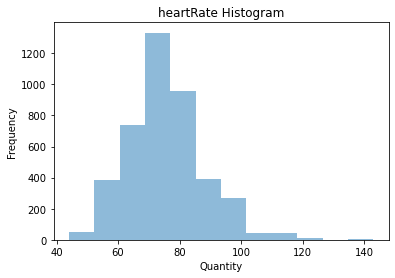

We can see that the data can be derive from a Normal Distribution


In [3]:
print("B")
#histogram
heart = df['heartRate'].dropna()
ax = heart.plot.hist(bins=12, alpha=0.5, title = 'heartRate Histogram')
plt.xlabel("Quantity")
plt.show()
print("We can see that the data can be derive from a Normal Distribution")

Text(0.5, 1.0, 'smokers heart rate histogram')

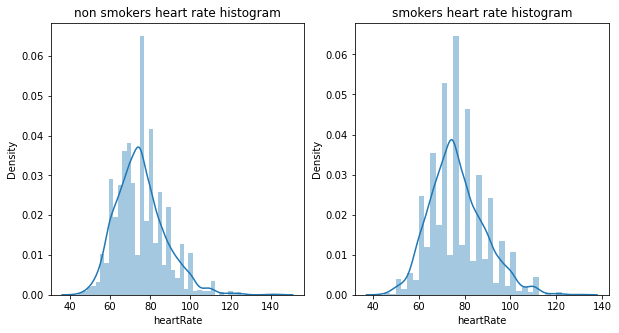

In [4]:
# histogram
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.distplot(df.loc[df['currentSmoker'] == 0]['heartRate'], ax=axs[0], axlabel='heartRate')
sns.distplot(df.loc[df['currentSmoker'] == 1]['heartRate'], ax=axs[1], axlabel='heartRate')
axs[0].set_title('non smokers heart rate histogram')
axs[1].set_title('smokers heart rate histogram')

In [5]:
#F test
import scipy
var0=np.var(data0)['heartRate']
var1=np.var(data1)['heartRate']
F=var0/var1
alpha = 0.05 
p_value = scipy.stats.f.cdf(F, n0-1, n1-1)
if p_value <= alpha:
    print("Reject- cannot preform t-test")
else:
    print("Not reject- can preform t-test")

Not reject- can preform t-test


In [6]:
#t-test
print("C")
from scipy import stats
t_statistics , t_pvalue = stats.ttest_ind(df_cs0,df_cs1,nan_policy='omit')
print("t statistics is",round(t_statistics,3) ,"\np-value is", round(t_pvalue,5))
if t_pvalue<=alpha: #alpha=0.05
    print("reject H0")
else:
    print("not reject H0")

C
t statistics is -4.066 
p-value is 5e-05
reject H0


In [7]:
#wald test
print("D")
w_statistic = round((mean0 - mean1)/np.sqrt(std_avg1**2 + std_avg0**2),3)
w_pvalue = round(2*stats.norm.cdf(-abs(w_statistic)), 20)
print("wald statistics is",w_statistic ,"\np-value is", round(w_pvalue,5))
if w_pvalue<=alpha:
    print("reject H0")
else:
    print("not reject H0")

D
wald statistics is -4.068 
p-value is 5e-05
reject H0


In [8]:
print("E")
print("In both t-test and wald-test we rejected H0")
print("t statistic is",round(t_statistics,3),"and wald statistic is",w_statistic)
if round(t_pvalue,5)!=round(w_pvalue,5):
    print("The p-values are not the same. t-p-value=%.5f" %t_pvalue,"≠ wald-p-value=%.5f"  %w_pvalue)
else:
    print("The p-values are the same. t-p-value=%.5f" %t_pvalue,"= wald-p-value=%.5f"  %w_pvalue)

E
In both t-test and wald-test we rejected H0
t statistic is -4.066 and wald statistic is -4.068
The p-values are the same. t-p-value=0.00005 = wald-p-value=0.00005


<h3>3. Different Sample Sizes</h3>

In [9]:
print("A")
sizes = [30, 50, 100, 500]
samples = {}
for s in sizes:
    samples[str(s)] = df.sample(s)
samples

A


{'30':       male  age  education  currentSmoker  cigsPerDay  BPMeds  diabetes  \
 2374     1   45        1.0              0         0.0     0.0         0   
 2157     1   54        1.0              0         0.0     0.0         0   
 4094     1   64        1.0              1         5.0     0.0         0   
 557      1   56        2.0              0         0.0     0.0         0   
 1191     1   60        2.0              1        20.0     0.0         0   
 4085     0   58        1.0              0         0.0     0.0         0   
 3381     1   51        2.0              0         0.0     0.0         0   
 4227     1   43        4.0              1        20.0     0.0         0   
 3093     1   40        4.0              0         0.0     0.0         0   
 446      1   61        1.0              0         0.0     0.0         0   
 1125     0   46        3.0              0         0.0     0.0         0   
 700      0   60        1.0              0         0.0     0.0         0   
 4168 

In [10]:
print("B")
import numpy as np
z_alpha=1.96 #standard normal distribution precent for alpha=0.05
result = {}
for i in sizes:
    df = samples[str(i)]
    data0 = df.loc[df['currentSmoker'] == 0]
    mean0 = data0['heartRate'].mean()
    n0 = data0.shape[0]
    std_avg0 = (data0['heartRate'].std())/np.sqrt(n0)
    #print(mean0, std_avg0)
    data1 = df.loc[df['currentSmoker'] == 1]
    mean1 = data1['heartRate'].mean()
    n1 = data1.shape[0]
    std_avg1 = (data1['heartRate'].std())/np.sqrt(n1)
    #print(mean1, std_avg1)
    result[str(i)] = [mean0, mean1, std_avg0, std_avg1]
    print("for sample size: {}".format(i))
    print('confidance interval for 0 [{:.3f},{:.3f}]'.format(mean0-z_alpha*std_avg0, mean0+z_alpha*std_avg0))
    print('confidance interval for 1 [{:.3f},{:.3f}]'.format(mean1-z_alpha*std_avg1, mean1+z_alpha*std_avg1))


B
for sample size: 30
confidance interval for 0 [67.555,79.739]
confidance interval for 1 [71.515,84.023]
for sample size: 50
confidance interval for 0 [72.018,82.196]
confidance interval for 1 [72.948,84.143]
for sample size: 100
confidance interval for 0 [72.718,78.475]
confidance interval for 1 [75.042,81.702]
for sample size: 500
confidance interval for 0 [72.879,75.684]
confidance interval for 1 [74.978,77.594]


The CI's from Q1:

confidance interval for average heart rate of smokers(0) [ 74.62161728829744 75.65450211468763 ]
confidance interval for average heart rate of non smokers(1) [ 76.13239977040986 77.14328107048836 ]

we can see that the CI's are wider than the CI's in Q1 and the smaller the sample size the wider the CI. 
there is a lot of over-lap between the confidance intervals of the avrage heart rate of smokers and non smokers for every sample size, in the contrary to Q1, but its intuitive because as we have less data the variance of the average heart rate increases, therefore, the CI's are wider, and more chance to over-lap between them.

In [11]:
print("C")
for s in sizes:
    mean0, mean1, std_avg0, std_avg1 = result[str(s)]
    w_statistic = round((mean0 - mean1)/np.sqrt(std_avg1**2 + std_avg0**2),3)
    w_pvalue = round(2*stats.norm.cdf(-abs(w_statistic)), 3)
    print("for sample size: {}".format(s))
    print("Wald-test results : statistic is {}, pvalue is {}".format(w_statistic , w_pvalue))
print("\nWe can see that as we increase the sample size- the statistic and p-value converge to the results in Q2")

C
for sample size: 30
Wald-test results : statistic is -0.925, pvalue is 0.355
for sample size: 50
Wald-test results : statistic is -0.373, pvalue is 0.709
for sample size: 100
Wald-test results : statistic is -1.236, pvalue is 0.216
for sample size: 500
Wald-test results : statistic is -2.049, pvalue is 0.04

We can see that as we increase the sample size- the statistic and p-value converge to the results in Q2


In [13]:
print("D")
import numpy as np
N = 100
CIs_0_l, CIs_0_u = np.empty((N,4)), np.empty((N,4))
CIs_1_l, CIs_1_u = np.empty((N,4)), np.empty((N,4))
CIs_0_len = np.empty((N,4))
CIs_1_len = np.empty((N,4))
pvalues = np.empty((N,4))
n_0 = {"30" : 0, "50": 0, "100" : 0, "500" : 0}
n_1 = {"30" : 0, "50": 0, "100" : 0, "500" : 0}
for i in range(N):
    # part a
    samples = {}
    for s in sizes:
        samples[str(s)] = df.sample(s)
    for j, s in enumerate(sizes):
        df = samples[str(s)]
        data0 = df.loc[df['currentSmoker'] == 0]
        mean0 = data0['heartRate'].mean()
        n0 = data0.shape[0]
        std_avg0 = (data0['heartRate'].std())/np.sqrt(n0)
        print(mean0, std_avg0)

        data1 = df.loc[df['currentSmoker'] == 1]
        mean1 = data1['heartRate'].mean()
        n1 = data1.shape[0]
        std_avg1 = (data1['heartRate'].std())/np.sqrt(n1)
        # part b
        CIs_0_l[i][j], CIs_0_u[i][j] = mean0-1.96*std_avg0, mean0+1.96*std_avg0
        CIs_1_l[i][j], CIs_1_u[i][j] = mean1-1.96*std_avg1, mean1+1.96*std_avg1
        CIs_0_len[i][j] = CIs_0_u[i][j] - CIs_0_l[i][j] #len CI
        CIs_1_len[i][j] = CIs_1_u[i][j] - CIs_1_l[i][j] #len CI
        # part c
        w_statistic = (mean1 - mean0)/np.sqrt(std_avg0**2 + std_avg1**2)
        pvalues[i][j] = 2*stats.norm.cdf(-abs(w_statistic))
        # check if mean in CI
        n_0[str(s)] = n_0[str(s)] + 1 if (avg_0 >= CIs_0_l[i][j] and avg_0 <= CIs_0_u[i][j]) else n_0[str(s)]
        n_1[str(s)] = n_1[str(s)] + 1 if (avg_1 >= CIs_1_l[i][j] and avg_1 <= CIs_1_u[i][j]) else n_1[str(s)]

73.85714285714286 2.904821953381605
72.79166666666667 2.5280879859558487
73.05882352941177 1.5996106792777784
74.28163265306122 0.7156610570143606
73.0 4.0276819911981905
73.34615384615384 1.9421972550476931
73.73584905660377 1.479700805133031
74.28163265306122 0.7156610570143607
77.33333333333333 3.1315090940869394
72.625 2.035742662618681
74.91304347826087 2.0064692682908634
74.28163265306122 0.7156610570143607
72.26666666666667 3.2564465978186163
75.46153846153847 2.0941168648828996
74.15217391304348 1.8644830373133783
74.28163265306122 0.7156610570143606
75.21052631578948 2.793663409891847
75.88888888888889 2.6431424267645274
74.93333333333334 1.8918752388019455
74.28163265306122 0.7156610570143606
69.875 2.369730997391898
74.04545454545455 2.3135936260181538
74.55319148936171 1.5460278579316535
74.28163265306122 0.7156610570143606
71.7 3.633333333333333
73.57692307692308 2.2299866001136404
73.02083333333333 1.6404380100013563
74.28163265306122 0.7156610570143608
77.23076923076923 

77.35714285714286 3.9829404661219705
74.13333333333334 2.0554012575411926
73.23913043478261 1.9045292526023494
74.28163265306122 0.7156610570143607
77.7 3.7209616439242628
73.06666666666666 1.9622490810135946
75.70212765957447 1.5677469865675986
74.28163265306122 0.7156610570143603
71.13333333333334 2.8914762528222364
72.38095238095238 2.4117531565195187
76.15555555555555 1.6329794160639137
74.28163265306122 0.7156610570143604
76.42857142857143 2.5863425865268237
70.73076923076923 1.4734132976059806
77.69767441860465 1.8799916600863917
74.28163265306122 0.7156610570143607
73.0909090909091 3.0820729312783968
72.88461538461539 2.0993236442515504
74.48076923076923 1.7525009891308234
74.28163265306122 0.7156610570143607
74.25 2.9287627959859632
71.66666666666667 2.00989615146717
73.46 1.4226190276947597
74.28163265306122 0.7156610570143606
74.27272727272727 3.0839493837695993
74.77777777777777 3.1441984707137887
73.01851851851852 1.3777940269399405
74.28163265306122 0.7156610570143603
72.6

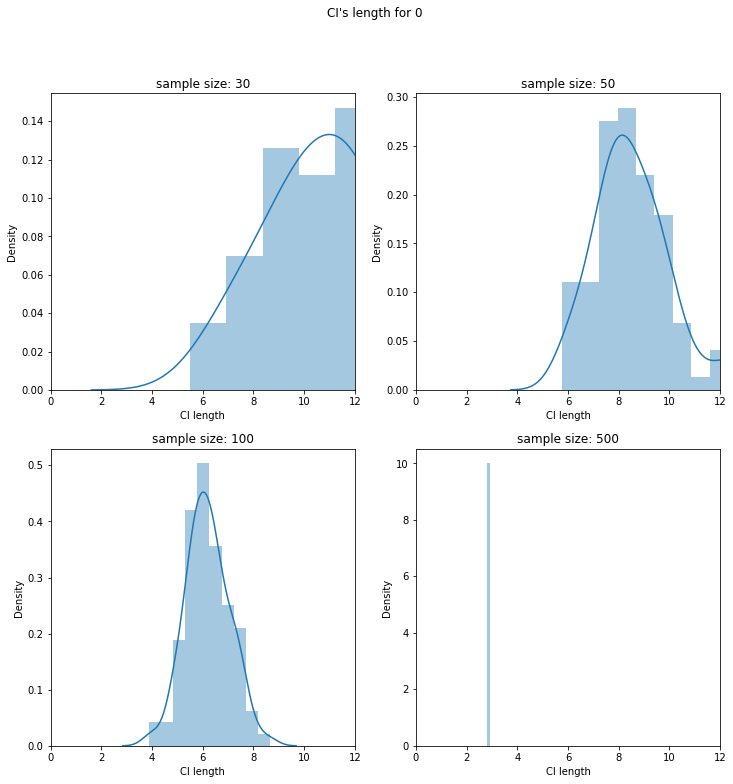

In [14]:
#distribution of lenght of CI's for every size sample
fig, axs = plt.subplots(2,2,figsize = (12,12))
fig.suptitle("CI's length for 0")
indices = [(0,0), (0,1), (1,0), (1,1)]
for j, s in enumerate(indices):
    x, y = s
    sns.distplot(CIs_0_len[:,j], ax=axs[x][y], axlabel='CI length')
    axs[x][y].set_title('sample size: {}'.format(sizes[j]))
    axs[x][y].set_xlim(left=0, right=12)

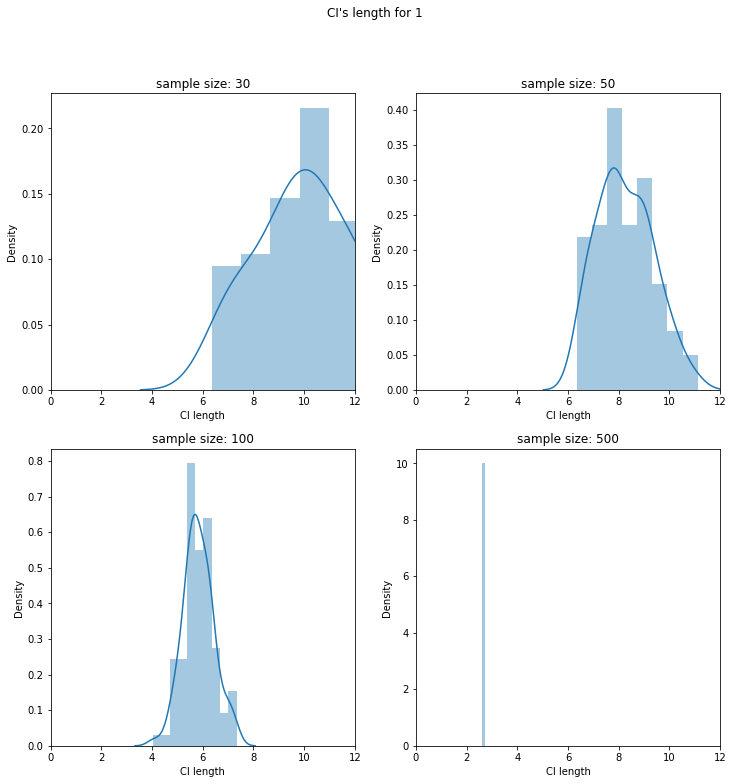

In [15]:
#distribution of lenght of CI's for every size sample
fig, axs = plt.subplots(2,2,figsize = (12,12))
fig.suptitle("CI's length for 1")
indices = [(0,0), (0,1), (1,0), (1,1)]
for j, s in enumerate(indices):
    x, y = s
    sns.distplot(CIs_1_len[:,j], ax=axs[x][y], axlabel='CI length')
    axs[x][y].set_title('sample size: {}'.format(sizes[j]))
    axs[x][y].set_xlim(left=0, right=12)

In [16]:
for s in sizes:
    print("{}% CI's for sample size {} contains the average heart rate of 0 from Q.1".format(n_0[str(s)],s))

92% CI's for sample size 30 contains the average heart rate of 0 from Q.1
89% CI's for sample size 50 contains the average heart rate of 0 from Q.1
93% CI's for sample size 100 contains the average heart rate of 0 from Q.1
100% CI's for sample size 500 contains the average heart rate of 0 from Q.1


In [17]:
for s in sizes:
    print("{}% CI's for sample size {} contains the average heart rate of 1 from Q.1".format(n_1[str(s)],s))

90% CI's for sample size 30 contains the average heart rate of 1 from Q.1
90% CI's for sample size 50 contains the average heart rate of 1 from Q.1
98% CI's for sample size 100 contains the average heart rate of 1 from Q.1
100% CI's for sample size 500 contains the average heart rate of 1 from Q.1


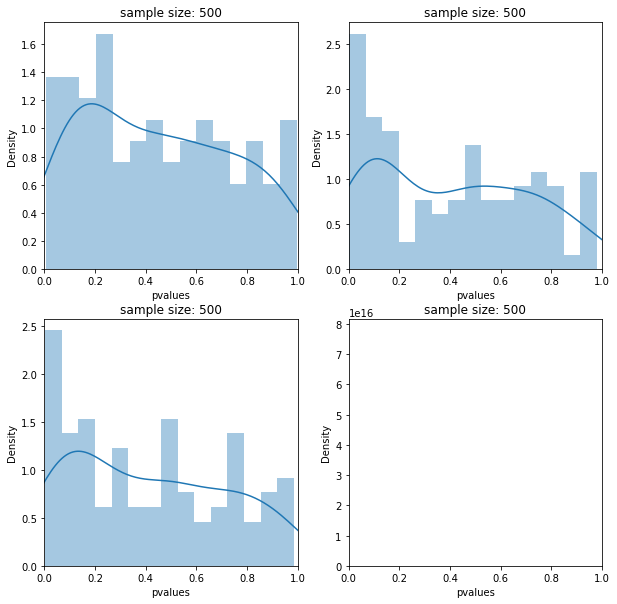

In [18]:
#p-value distribtion
fig, axs = plt.subplots(2,2,figsize = (10,10))
indices = [(0,0), (0,1), (1,0), (1,1)]
for i, s in enumerate(indices):
    pvalues_x = pvalues[:,i]
    x, y = s
    sns.distplot(pvalues_x, ax=axs[x][y], axlabel='pvalues', bins=15)
    axs[x][y].set_title('sample size: {}'.format(sizes[j]))
    axs[x][y].set_xlim(left=0, right=1)

In [19]:
pv_mean = pvalues.mean(axis=0)
for i, y in enumerate(pv_mean):
    print("average pvalue for sample size {} : {}".format(sizes[i], round(y,3)))
pv_std = pvalues.std(axis=0)
for i, y in enumerate(pv_std):
    print("standard deviation pvalue for sample size {} : {}".format(sizes[i], round(y,3)))
pv_median = np.median(pvalues, axis=0)
for i, y in enumerate(pv_median):
    print("median pvalue for sample size {} : {}".format(sizes[i], round(y,3)))

for i, s in enumerate(indices):
    pvalues_x = pvalues[:,i]
    reject = pvalues_x <= 0.05
    print("number of pvalue smaller or equal than 0.05, for sample size {}: {}".format(sizes[i], len(np.where(reject == True)[0])))

average pvalue for sample size 30 : 0.447
average pvalue for sample size 50 : 0.411
average pvalue for sample size 100 : 0.414
average pvalue for sample size 500 : 0.04
standard deviation pvalue for sample size 30 : 0.292
standard deviation pvalue for sample size 50 : 0.3
standard deviation pvalue for sample size 100 : 0.302
standard deviation pvalue for sample size 500 : 0.0
median pvalue for sample size 30 : 0.427
median pvalue for sample size 50 : 0.399
median pvalue for sample size 100 : 0.368
median pvalue for sample size 500 : 0.04
number of pvalue smaller or equal than 0.05, for sample size 30: 7
number of pvalue smaller or equal than 0.05, for sample size 50: 13
number of pvalue smaller or equal than 0.05, for sample size 100: 16
number of pvalue smaller or equal than 0.05, for sample size 500: 100


we can see that the bigger the sample size we got that the pvalues are more closer to zero.
specificaly, for  𝛼=0.05  we see that the bigger the sample size the more pvalues are smaller or equal than 0.05. it means that the bigger the sample size it is more likley to reject the null hypothesis.